In [7]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
data = pd.read_excel('../stage_report/Sutton_Borough_Data.xlsx')
data.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000382-01012019,01 Jan 2019,2019,07:54:10,7,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,...,893.0,Sutton,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1
1,000553-01012019,01 Jan 2019,2019,16:49:19,16,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,437.0,Wallington,NaN,NaN,2.0,2.0,2.0,2.0,666.0,1
2,000577-01012019,01 Jan 2019,2019,18:16:05,18,Special Service,Special Service,Assist other agencies,Dwelling,House - single occupancy,...,382.0,Wallington,424.0,Croydon,2.0,2.0,2.0,4.0,1332.0,1
3,000624-01012019,01 Jan 2019,2019,21:08:28,21,Fire,Primary Fire,NaN,Outdoor Structure,Other outdoor equipment/machinery,...,364.0,Sutton,691.0,Surbiton,2.0,2.0,2.0,3.0,999.0,1
4,000730-02012019,02 Jan 2019,2019,06:10:00,6,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,...,283.0,Sutton,620.0,Wallington,2.0,2.0,2.0,1.0,333.0,1


In [8]:
data_subset = data[['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall', 'IncidentGroup']]
data_subset.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup
0,000382-01012019,01 Jan 2019,2019,07:54:10,7,Fire
1,000553-01012019,01 Jan 2019,2019,16:49:19,16,False Alarm
2,000577-01012019,01 Jan 2019,2019,18:16:05,18,Special Service
3,000624-01012019,01 Jan 2019,2019,21:08:28,21,Fire
4,000730-02012019,02 Jan 2019,2019,06:10:00,6,False Alarm


In [9]:
data_subset.isnull().sum()

IncidentNumber    0
DateOfCall        0
CalYear           0
TimeOfCall        0
HourOfCall        0
IncidentGroup     0
dtype: int64

In [10]:
data_subset.dtypes

IncidentNumber    object
DateOfCall        object
CalYear            int64
TimeOfCall        object
HourOfCall         int64
IncidentGroup     object
dtype: object

In [11]:
'DateOfCall' is a datetime column, derive 'HourOfCall' and 'DayOfWeek', etc.
data_subset['DateOfCall'] = pd.to_datetime(data_subset['DateOfCall'])
data_subset['TimeOfCall'] = pd.to_datetime(data_subset['TimeOfCall'])

/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_49063/7370002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['DateOfCall'] = pd.to_datetime(data_subset['DateOfCall'])
/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_49063/7370002.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_subset['TimeOfCall'] = pd.to_datetime(data_subset['TimeOfCall'])
/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_49063/7370002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [12]:
data_subset.dtypes

IncidentNumber            object
DateOfCall        datetime64[ns]
CalYear                    int64
TimeOfCall        datetime64[ns]
HourOfCall                 int64
IncidentGroup             object
dtype: object

In [13]:
# derived 'hour' from 'TimeOfCall'
data_subset['HourOfCall'] = data_subset['TimeOfCall'].dt.hour

# derived 'DayOfWeek' from 'DateOfCall'
data_subset['DayOfWeek'] = data_subset['DateOfCall'].dt.dayofweek


/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_49063/4141809004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['HourOfCall'] = data_subset['TimeOfCall'].dt.hour
/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_49063/4141809004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['DayOfWeek'] = data_subset['DateOfCall'].dt.dayofweek


In [14]:
data_subset.dtypes

IncidentNumber            object
DateOfCall        datetime64[ns]
CalYear                    int64
TimeOfCall        datetime64[ns]
HourOfCall                 int32
IncidentGroup             object
DayOfWeek                  int32
dtype: object

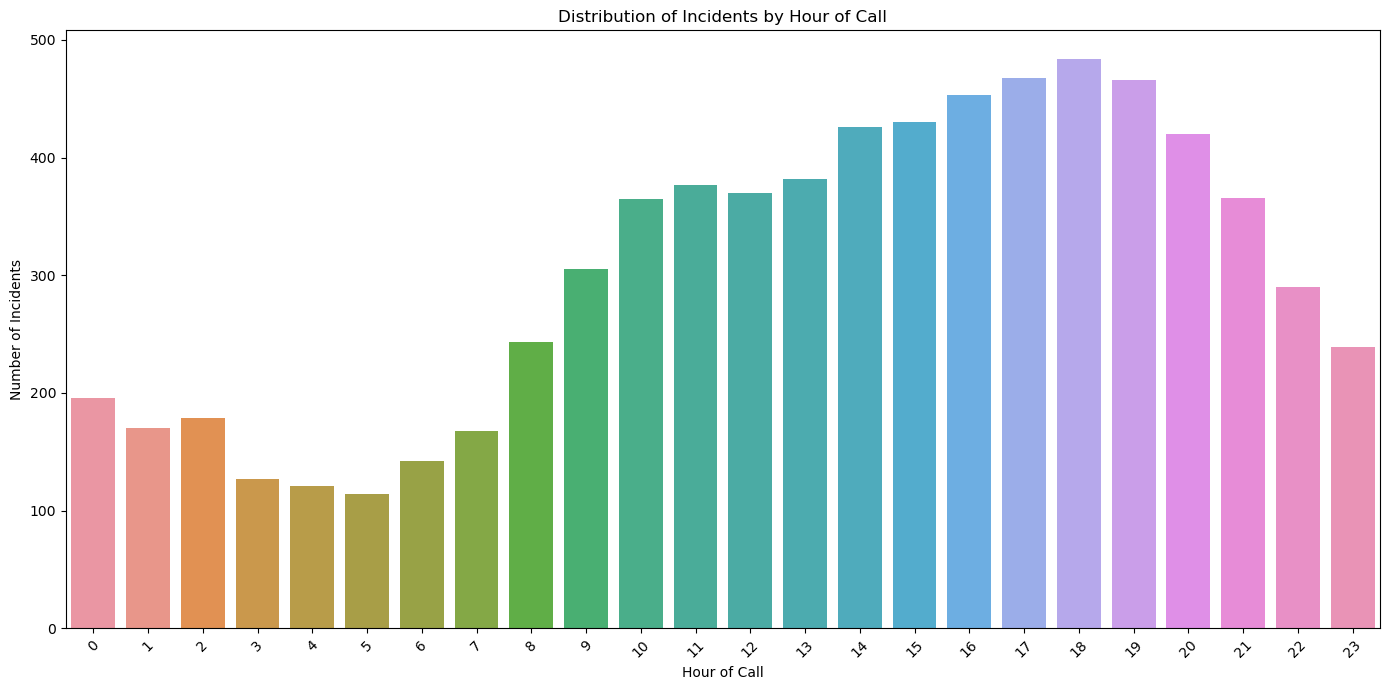

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Incidents by Hour of Call
plt.figure(figsize=(14, 7))
sns.countplot(x='HourOfCall', data=data_subset)
plt.title('Distribution of Incidents by Hour of Call')
plt.xlabel('Hour of Call')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

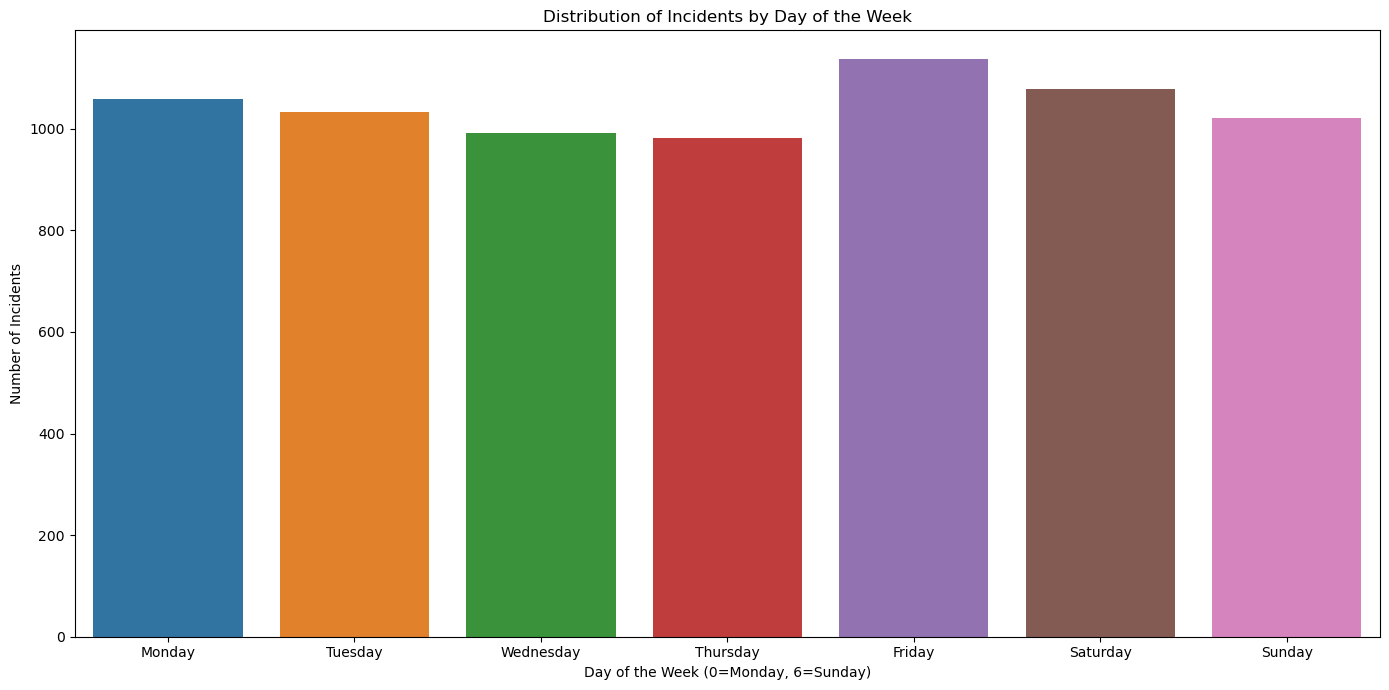

In [16]:
# Distribution of Incidents by Day of the Week
plt.figure(figsize=(14, 7))
sns.countplot(x='DayOfWeek', data=data_subset)
plt.title('Distribution of Incidents by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Incidents')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()

plt.show()


In [19]:
data_subset = data[['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall', 'IncidentGroup', 'PropertyCategory', 'PropertyType']]

data_subset

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,PropertyCategory,PropertyType
0,000382-01012019,01 Jan 2019,2019,07:54:10,7,Fire,Non Residential,Private Garden Shed
1,000553-01012019,01 Jan 2019,2019,16:49:19,16,False Alarm,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...
2,000577-01012019,01 Jan 2019,2019,18:16:05,18,Special Service,Dwelling,House - single occupancy
3,000624-01012019,01 Jan 2019,2019,21:08:28,21,Fire,Outdoor Structure,Other outdoor equipment/machinery
4,000730-02012019,02 Jan 2019,2019,06:10:00,6,False Alarm,Dwelling,Self contained Sheltered Housing
...,...,...,...,...,...,...,...,...
7296,195534-30112022,30 Nov 2022,2022,18:31:42,18,Fire,Dwelling,Self contained Sheltered Housing
7297,195535-30112022,30 Nov 2022,2022,18:32:42,18,Special Service,Dwelling,House - single occupancy
7298,195608-30112022,30 Nov 2022,2022,20:26:57,20,False Alarm,Non Residential,DIY Warehouse
7299,195611-30112022,30 Nov 2022,2022,20:32:44,20,False Alarm,Dwelling,Licensed House in Multiple Occupation - Up to ...


In [20]:
data_subset.dtypes

IncidentNumber      object
DateOfCall          object
CalYear              int64
TimeOfCall          object
HourOfCall           int64
IncidentGroup       object
PropertyCategory    object
PropertyType        object
dtype: object

In [21]:
data_subset.isnull().sum()

IncidentNumber      0
DateOfCall          0
CalYear             0
TimeOfCall          0
HourOfCall          0
IncidentGroup       0
PropertyCategory    0
PropertyType        0
dtype: int64

In [22]:
data_subset['DateOfCall'] = pd.to_datetime(data_subset['DateOfCall'])
data_subset['TimeOfCall'] = pd.to_datetime(data_subset['TimeOfCall'])

/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_49063/7370002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['DateOfCall'] = pd.to_datetime(data_subset['DateOfCall'])
/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_49063/7370002.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_subset['TimeOfCall'] = pd.to_datetime(data_subset['TimeOfCall'])
/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_49063/7370002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [23]:
data_subset['HourOfCall'] = data_subset['TimeOfCall'].dt.hour

data_subset['DayOfWeek'] = data_subset['DateOfCall'].dt.dayofweek

/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_49063/299885733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['HourOfCall'] = data_subset['TimeOfCall'].dt.hour
/var/folders/j4/ht1gj4d93d59dff35jybnp_c0000gn/T/ipykernel_49063/299885733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['DayOfWeek'] = data_subset['DateOfCall'].dt.dayofweek


In [24]:
data_subset.dtypes

IncidentNumber              object
DateOfCall          datetime64[ns]
CalYear                      int64
TimeOfCall          datetime64[ns]
HourOfCall                   int32
IncidentGroup               object
PropertyCategory            object
PropertyType                object
DayOfWeek                    int32
dtype: object

In [25]:
data_subset.describe()

,DateOfCall,CalYear,TimeOfCall,HourOfCall,DayOfWeek
count,7301,7301.000000,7301,7301.000000,7301.000000
mean,2021-02-02 00:06:30.521846272,2020.582934,2024-04-05 14:03:41.922613504,13.563895,3.016984
min,2019-01-01 00:00:00,2019.000000,2024-04-05 00:00:19,0.000000,0.000000
25%,2020-01-24 00:00:00,2020.000000,2024-04-05 10:11:32,10.000000,1.000000
50%,2021-03-16 00:00:00,2021.000000,2024-04-05 14:55:07,14.000000,3.000000
75%,2022-02-17 00:00:00,2022.000000,2024-04-05 18:54:05,18.000000,5.000000
max,2022-11-30 00:00:00,2022.000000,2024-04-05 23:59:50,23.000000,6.000000
std,NaN,1.130949,NaN,6.079873,2.003213


In [26]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initializing the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # 'handle_unknown' to ignore unseen categories

# Selecting the variables to encode
categories_to_encode = data_subset[['PropertyCategory', 'PropertyType']]

# Fitting the encoder and transforming the selected variables
encoded_categories = encoder.fit_transform(categories_to_encode)

# Creating a DataFrame with the encoded variables
# Note: This operation can significantly increase the number of features in the dataset
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categories_to_encode.columns))

# Concatenating the encoded variables with the original dataset
# Ensure indices are aligned; reset index if necessary
data_subset = data_subset.reset_index(drop=True)
data_subset_encoded = pd.concat([data_subset, encoded_df], axis=1)

# Dropping the original categorical variables
data_subset_encoded.drop(['PropertyCategory', 'PropertyType'], axis=1, inplace=True)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
print("Before encoding:", data_subset.shape)
print("After encoding:", data_subset_encoded.shape)


Before encoding: (7301, 9)
After encoding: (7301, 194)


In [28]:
data_subset_encoded.head()


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,DayOfWeek,PropertyCategory_Dwelling,PropertyCategory_Non Residential,PropertyCategory_Other Residential,...,PropertyType_Van,PropertyType_Vehicle Repair Workshop,PropertyType_Vehicle sales building,PropertyType_Veterinary surgery,PropertyType_Warehouse,PropertyType_Wasteland,PropertyType_Wheelie bin (domestic size),PropertyType_Woodland/forest - broadleaf/hardwood,PropertyType_Woodland/forest - conifers/softwood,PropertyType_Youth hostel
0,000382-01012019,2019-01-01,2019,2024-04-05 07:54:10,7,Fire,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000553-01012019,2019-01-01,2019,2024-04-05 16:49:19,16,False Alarm,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000577-01012019,2019-01-01,2019,2024-04-05 18:16:05,18,Special Service,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000624-01012019,2019-01-01,2019,2024-04-05 21:08:28,21,Fire,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000730-02012019,2019-01-02,2019,2024-04-05 06:10:00,6,False Alarm,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data_subset_encoded.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'DayOfWeek', 'PropertyCategory_Dwelling',
       'PropertyCategory_Non Residential',
       'PropertyCategory_Other Residential',
       ...
       'PropertyType_Van ', 'PropertyType_Vehicle Repair Workshop',
       'PropertyType_Vehicle sales building',
       'PropertyType_Veterinary surgery', 'PropertyType_Warehouse ',
       'PropertyType_Wasteland ', 'PropertyType_Wheelie bin (domestic size)',
       'PropertyType_Woodland/forest - broadleaf/hardwood ',
       'PropertyType_Woodland/forest - conifers/softwood ',
       'PropertyType_Youth hostel '],
      dtype='object', length=194)

Need to understand

In [30]:
# Summarize incidents by PropertyType
incident_counts_by_property_type = data_subset.groupby('PropertyType').size().sort_values(ascending=False)
print(incident_counts_by_property_type)


PropertyType
House - single occupancy                              1125
Purpose Built Flats/Maisonettes - Up to 3 storeys     1106
Self contained Sheltered Housing                       446
Purpose Built Flats/Maisonettes - 4 to 9 storeys       423
Car                                                    362
                                                      ... 
Straw/stubble burning                                    1
Manufacturing assembly plant                             1
Laundrette                                               1
Railway building - other                                 1
Youth hostel                                             1
Length: 180, dtype: int64


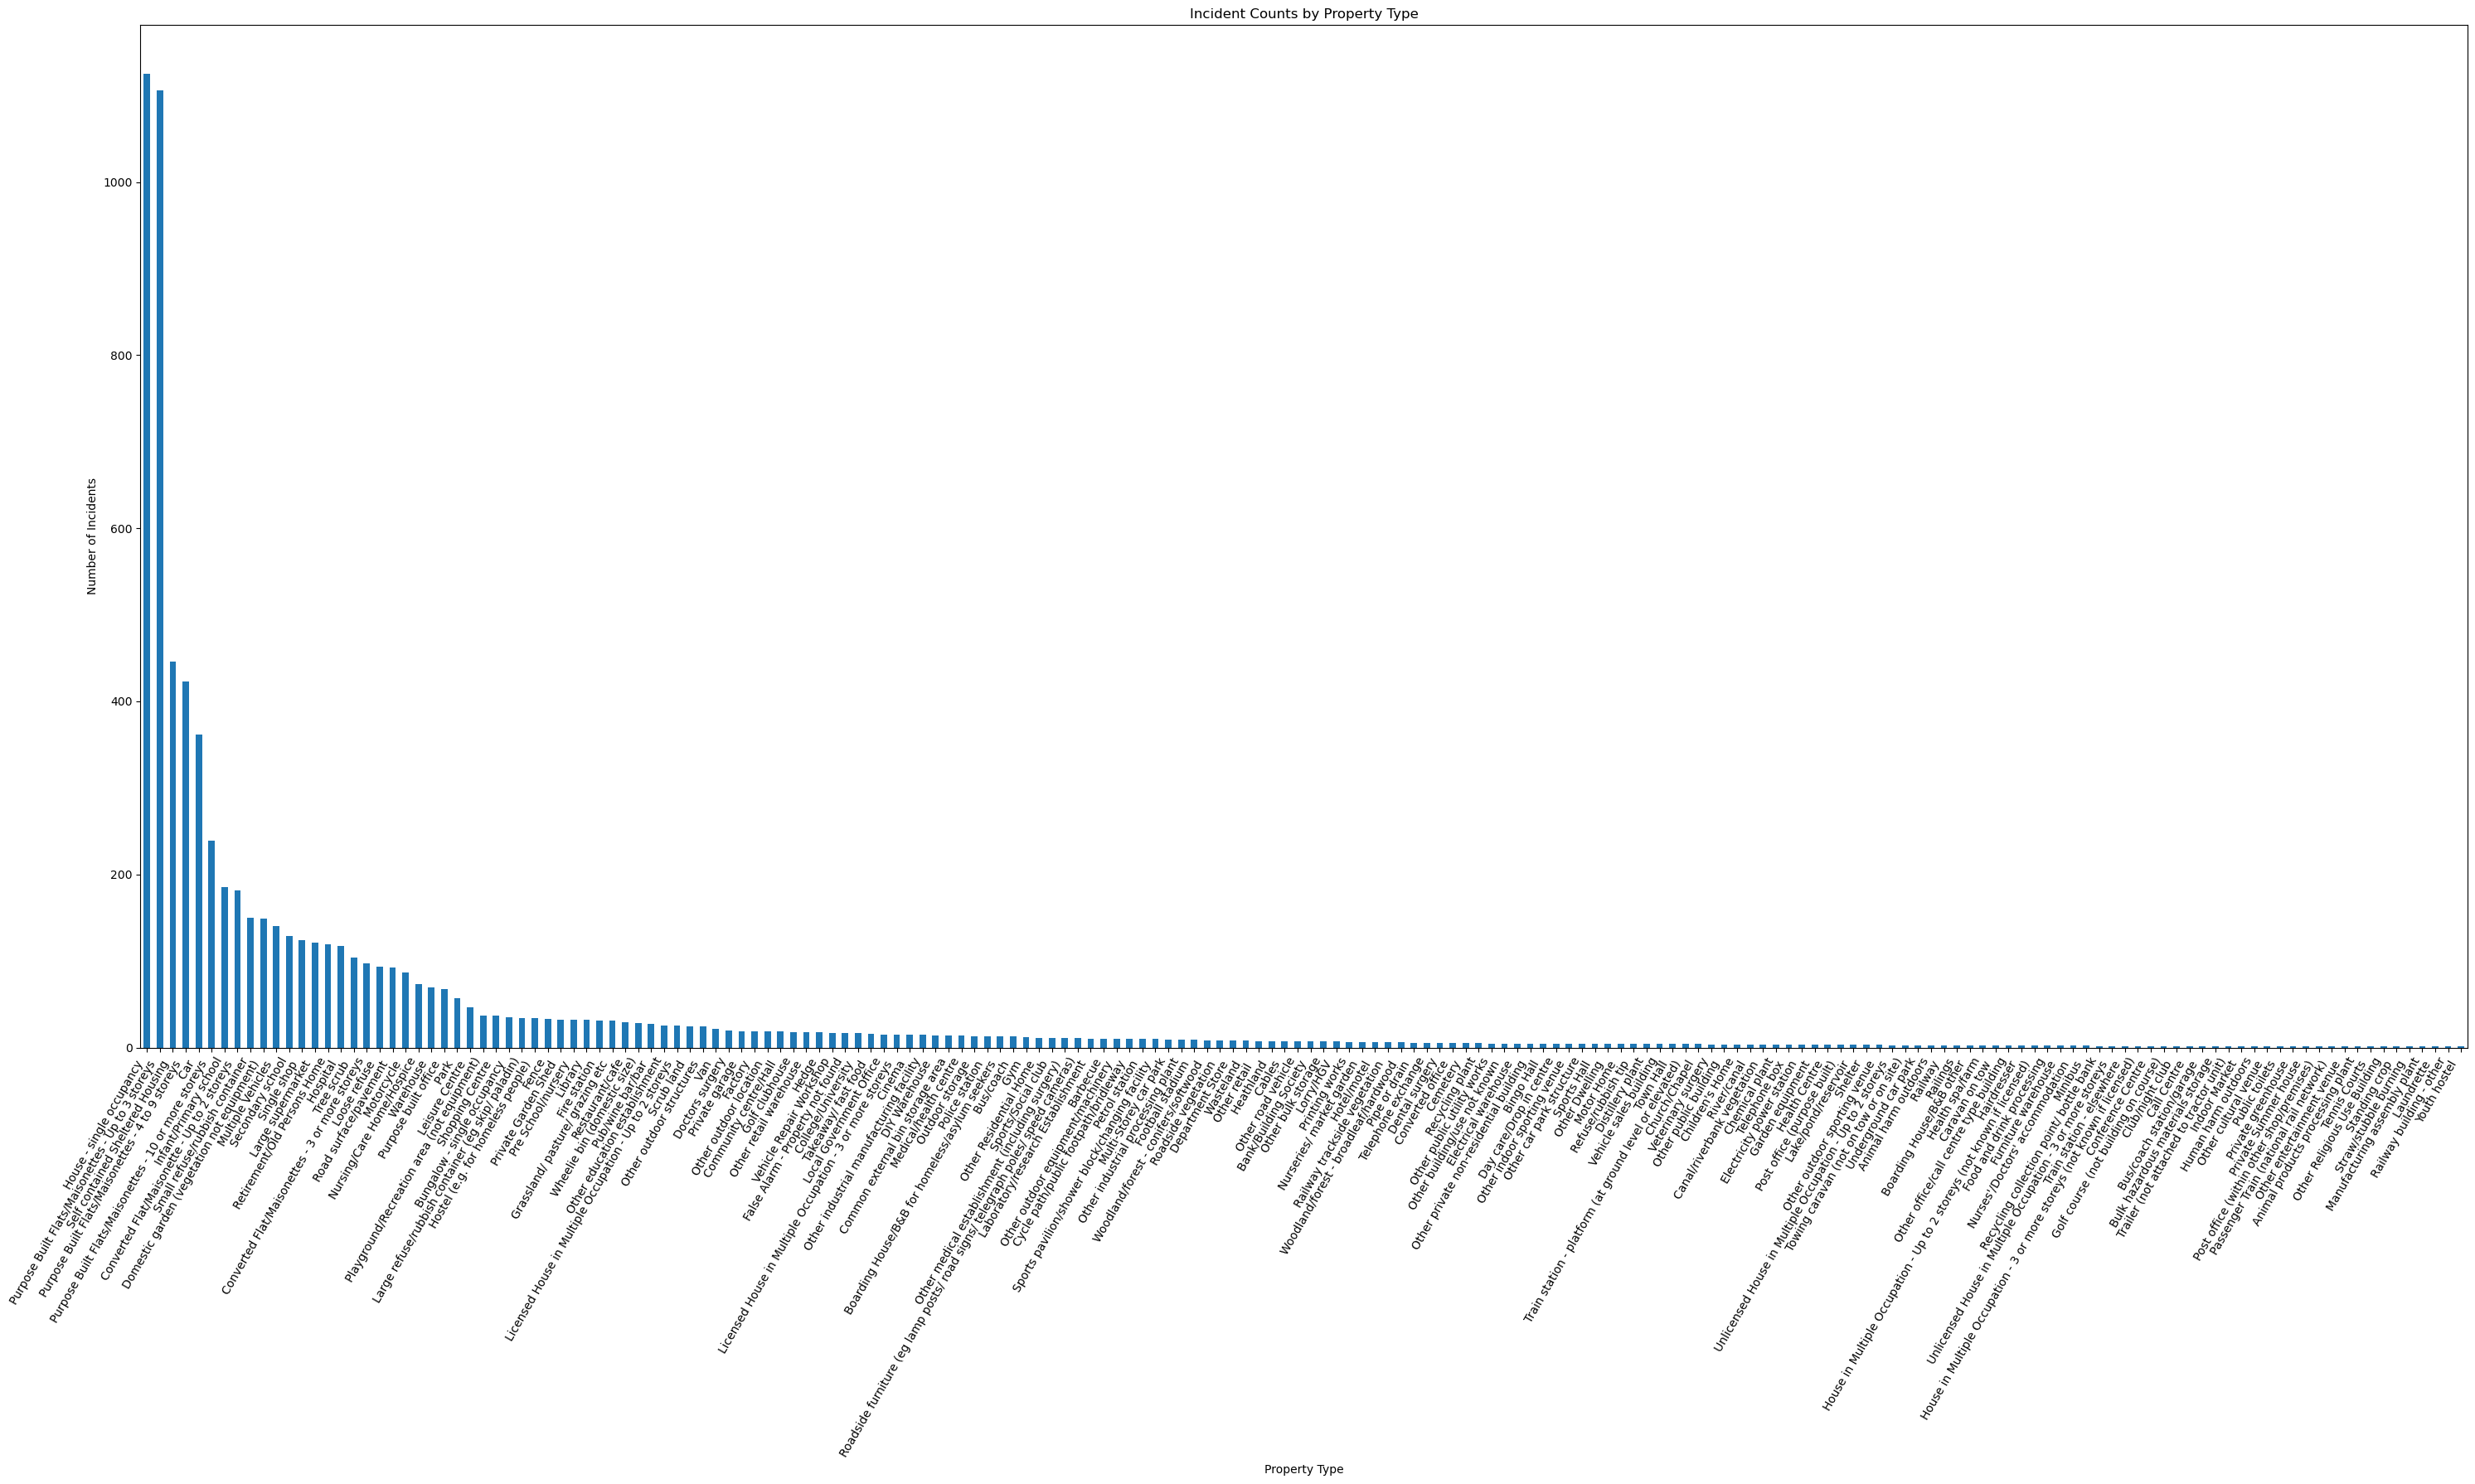

In [31]:
import matplotlib.pyplot as plt
incident_counts_by_property_type.plot(kind='bar', figsize=(30, 18))
plt.title('Incident Counts by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()


Need to understand as well.

In [32]:
# Create a cross-tabulation of PropertyCategory vs IncidentGroup
category_vs_incident_type = pd.crosstab(data_subset['PropertyCategory'], data_subset['IncidentGroup'])
print(category_vs_incident_type)


IncidentGroup      False Alarm  Fire  Special Service
PropertyCategory                                     
Dwelling                  2072   364             1284
Non Residential           1286   120              201
Other Residential          213    16               35
Outdoor                    163   403              139
Outdoor Structure           44   281               30
Rail Vehicle                 0     0                1
Road Vehicle                41   153              455


Need to understand!!!

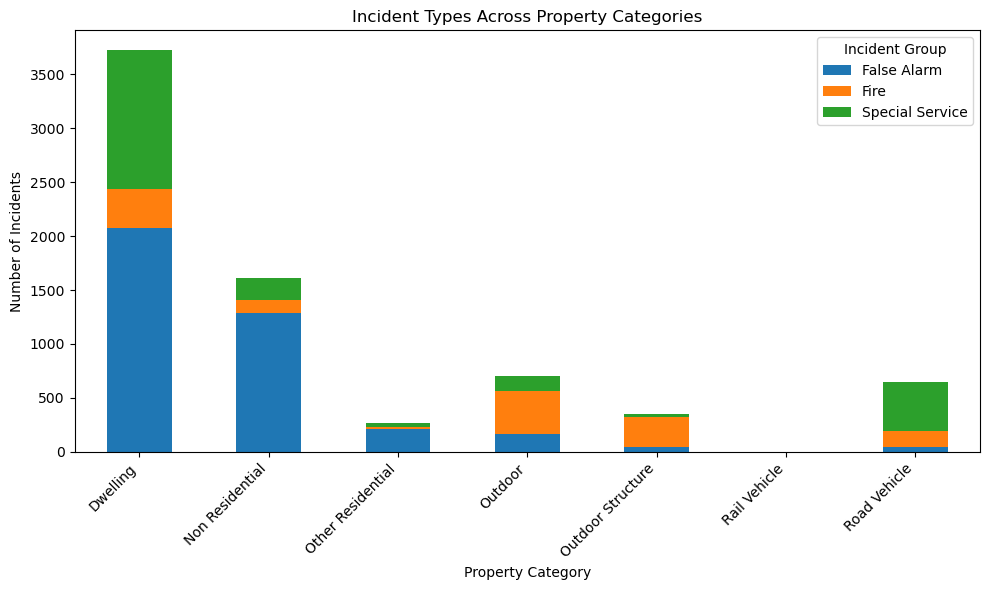

In [33]:
category_vs_incident_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Incident Types Across Property Categories')
plt.xlabel('Property Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title='Incident Group')
plt.show()


Chi-Square Test of Independence:

The Chi-Square Test helps determine if there's a significant association between two categorical variables. It's ideal for understanding if the distribution of one categorical variable differs among categories of another.

In [34]:
from scipy.stats import chi2_contingency


## Create a contingency table for IncidentGroup and one of the property-related variables. Let's use PropertyCategory

In [35]:
contingency_table = pd.crosstab(index=data_subset['IncidentGroup'], columns=data_subset['PropertyCategory'])
print(contingency_table)


PropertyCategory  Dwelling  Non Residential  Other Residential  Outdoor  \
IncidentGroup                                                             
False Alarm           2072             1286                213      163   
Fire                   364              120                 16      403   
Special Service       1284              201                 35      139   

PropertyCategory  Outdoor Structure  Rail Vehicle  Road Vehicle  
IncidentGroup                                                    
False Alarm                      44             0            41  
Fire                            281             0           153  
Special Service                  30             1           455  


In [36]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")


Chi-Square Statistic: 3007.9126470664055, P-value: 0.0


# Visualization with Heatmap:

#### A heatmap can visually represent the relationship between two categorical variables, making it easier to identify patterns or strong associations.

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


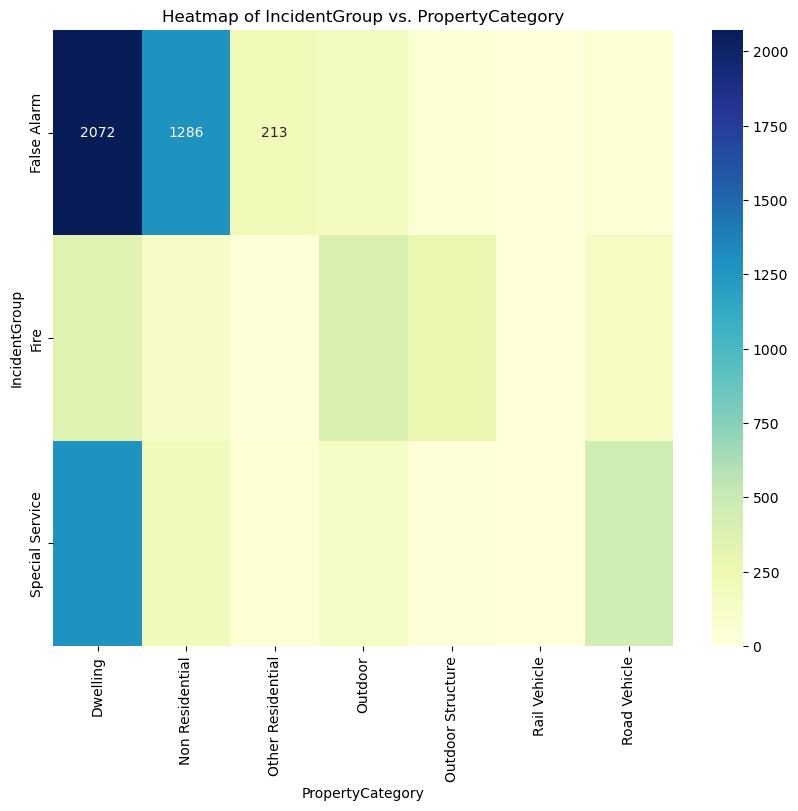

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap of IncidentGroup vs. PropertyCategory')
plt.ylabel('IncidentGroup')
plt.xlabel('PropertyCategory')
plt.show()


In [39]:
# Drop the IncidentNumber, and IncidentNumber column
X = data_subset.drop(['IncidentGroup', 'IncidentNumber'], axis=1)


In [40]:
# Verify that all columns are now numeric
print(X.dtypes)


DateOfCall          datetime64[ns]
CalYear                      int64
TimeOfCall          datetime64[ns]
HourOfCall                   int32
PropertyCategory            object
PropertyType                object
DayOfWeek                    int32
dtype: object


In [41]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# Initializing the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # 'handle_unknown' to ignore unseen categories

# Selecting the variables to encode
categories_to_encode = data_subset[['PropertyCategory', 'PropertyType']]

# Fitting the encoder and transforming the selected variables
encoded_categories = encoder.fit_transform(categories_to_encode)

# Creating a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categories_to_encode.columns))

# Concatenating the encoded variables with the original dataset
data_subset = data_subset.reset_index(drop=True)
data_subset_encoded = pd.concat([data_subset, encoded_df], axis=1)

# Dropping the original categorical variables
data_subset_encoded.drop(['PropertyCategory', 'PropertyType'], axis=1, inplace=True)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
print(X.dtypes)

DateOfCall          datetime64[ns]
CalYear                      int64
TimeOfCall          datetime64[ns]
HourOfCall                   int32
PropertyCategory            object
PropertyType                object
DayOfWeek                    int32
dtype: object


In [43]:
X = X.drop(['DateOfCall', 'TimeOfCall'], axis=1)


In [44]:
print(X.dtypes)

CalYear              int64
HourOfCall           int32
PropertyCategory    object
PropertyType        object
DayOfWeek            int32
dtype: object


In [45]:
from sklearn.preprocessing import OneHotEncoder

# Initializing the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fitting and transforming the encoder on PropertyCategory and PropertyType
encoded_features = encoder.fit_transform(X[['PropertyCategory', 'PropertyType']])

# Creating a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['PropertyCategory', 'PropertyType']))

# Dropping the original columns
X = X.drop(['PropertyCategory', 'PropertyType'], axis=1)

# Concatenating the encoded features with the rest of the dataset
X = pd.concat([X.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
print(X.dtypes)

CalYear                                                 int64
HourOfCall                                              int32
DayOfWeek                                               int32
PropertyCategory_Dwelling                             float64
PropertyCategory_Non Residential                      float64
                                                       ...   
PropertyType_Wasteland                                float64
PropertyType_Wheelie bin (domestic size)              float64
PropertyType_Woodland/forest - broadleaf/hardwood     float64
PropertyType_Woodland/forest - conifers/softwood      float64
PropertyType_Youth hostel                             float64
Length: 190, dtype: object


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# X now only contains numeric features
y = data_subset['IncidentGroup']  # Target variable remains the same

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate the performance of the model using accuracy, precision, recall, F1-score, and the confusion matrix are commonly used metrics in the classification problem.

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6433949349760438
Classification Report:
                  precision    recall  f1-score   support

    False Alarm       0.71      0.74      0.72       754
           Fire       0.62      0.61      0.61       280
Special Service       0.53      0.49      0.51       427

       accuracy                           0.64      1461
      macro avg       0.62      0.61      0.62      1461
   weighted avg       0.64      0.64      0.64      1461

Confusion Matrix:
 [[560  60 134]
 [ 60 170  50]
 [172  45 210]]


# Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Accuracy: 0.6940451745379876
Classification Report:
                  precision    recall  f1-score   support

    False Alarm       0.67      0.92      0.78       754
           Fire       0.75      0.64      0.69       280
Special Service       0.75      0.32      0.45       427

       accuracy                           0.69      1461
      macro avg       0.72      0.63      0.64      1461
   weighted avg       0.71      0.69      0.67      1461

Confusion Matrix:
 [[696  42  16]
 [ 70 180  30]
 [270  19 138]]
